In [ ]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---
#### CS 260 Final Project - SP23
---

# Life Expectancy and it's Causes Around the World

### By: Jordan Lewis, Cole Schamber


---

## 1. Introduction

For this project, our group explored the main topic of life expectancy and the different possible influences and relationships different variables and factors could have. Our database presented multiple figures and catagorical data to explore to help us better under stand the stance of life expectancy in the 21st century. With the improvement in medical technology and the rapid growth of globalization, it is interesting to see how life expectancy and the citzens of each country has changed. Through out time, the different countries in our world have also experienced economic change, civil unrest, and other major events and changes that could largely impact the health and life span of its citzens. In this project, we would like to explore and understannd our data and the potential influences of life expectancy age.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

According to Kaggle, the data was collected via  a collection and combination of The Global Health Observatory (GHO) under World Health Organization (WHO) database data repository. This is kept and updated every year for each country for the past 15 years (2000-2015).



In [ ]:
#In this cell, we load the data.
try:
    #load your csv data from github.
    csv_data = pd.read_csv("https://raw.githubusercontent.com/cs1187/life-expectancy/main/life_expectancy.csv")
    gvt_data = pd.read_csv("https://raw.githubusercontent.com/cs1187/gvt_data/main/government_data.csv")

    #Connect to a database
    conn = sql.connect('life_expectancy.db')

    #Load the csv data into a table using the connection to the db
    #that you just created in the previous line.
    csv_data.to_sql('life_exp', conn, index = False)
    gvt_data.to_sql('gvt_data', conn,  index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

In [ ]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM life_exp"""

results = pd.read_sql_query(sql_statement, conn)
results

,country,yr,status,life_expec,adult_mor,infant_death,alcohol,perc_exp,hepatitis_B,measles,...,polio,total_exp,diphtheria,hiv_aids,gdp,population,thin_1_19_yrs,thin_5_9_yrs,inc_comp_res,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### 2.1 Summary of Variables within the life_exp Table

The life expectancy table has 22 columns/variables and 2938 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "life_exp" (
	"country"	TEXT,
	"yr"	INTEGER,
	"status"	TEXT,
	"life_expec"	NUMERIC,
	"adult_mor"	REAL,
	"infant_death"	INTEGER,
	"alcohol"	NUMERIC,
	"perc_exp"	REAL,
	"hepatitis_B"	INTEGER,
	"measles"	INTEGER,
	"bmi"	REAL,
	"ufive_death"	INTEGER,
	"polio"	INTEGER,
	"total_exp"	REAL,
	"diphtheria"	INTEGER,
	"hiv_aids"	REAL,
	"gdp"	REAL,
	"population"	INTEGER,
	"thin_1_19_yrs"	REAL,
	"thin_5_9 yrs"	REAL,
	"inc_comp_res"	REAL,
	"schooling"	REAL,
	PRIMARY KEY("country","year")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.




* **country** – the name of the country
    * Number of missing values: 0
    * Contains 192 distinct values: Afghanistan, Albania, Algeria, Angola, Antigua, Barbuda, Venezuela (Bolivarian Republic of), Viet Nam, Yemen, Zambia, Zimbabwe


* **status** – labels if a country is a developing or developed country


    * Number of missing values: 0
    * Contains 2 distinct values: Developed: the country has a mature and sophisticated economy measured by GDP and/or average income per resident.
						Developing: the country has a less gdp than developed countries and has a less mature economy.


* **yr** –  the year of the record
    * Number of missing values: 0
    * max value: 2015
    * min value: 2000
    * average value: 2007






* **life_expec** – how long a person is expected to live(years)
    * Number of missing values: 10
    * Units: years
    * max value: 89.0
    * min value: 36.3
    * average value: 69.2

* **adult_mor** – Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
    * Number of missing values: 10
    * max value: 723.0
    * min value: 1
    * average value: 164.79


* **infant_death** –  number of infant deaths (per 1000)
    * Number of missing values: 0
    * max value: 1800
    * min value: 0
    * average value: 30.30


* **alcohol** – alcohol consumption per capita in liters
    * Number of missing values: 194
    * Units: liters
    * max value: 17.84
    * min value: .01
    * average value: 4.60


* **perc_exp** – the percentage of expenditure on health as a percentage of Gross Domestic Product per capita
    * Number of missing values: 0
    * max value: 19479.911
    * min value: 0
    * average value: 738.25


* **hepatitis_B** – Hepatitis B (HepB) immunization coverage among 1-year-olds percentage
    * Number of missing values: 553
    * max value: 99
    * min value: 1
    * average value: 80.94
* **measles** –  number of reported cases per 1000 population
    * Number of missing values: 0
    * max value: 212183
    * min value: 0
    * average value: 2419.59
* **bmi** – Average Body Mass Index of the entire population
    * Number of missing values: 34
    * Units: kg/m2
    * max value: 34
    * min value: 1
    * average value: 38.32
* **ufive_death** – Number of under-five deaths per 1000 population
    * Number of missing values: 0
    * Units: deaths
    * max value: 2500
    * min value: 0
    * average value: 42.04
* **polio** - Polio (Pol3) immunization coverage among 1-year-olds (%)
    * Number of missing values: 19
    * max value: 99
    * min value: 3
    * average value: 82.55
* **total_exp** - General government expenditure on health as a percentage of total government expenditure (%)
    * Number of missing values: 226
    * max value: 17.6
    * min value: .37
    * average value: 5.94
* **diphtheria** - Diphtheria tetanus toxoid and pertussis (DTP3)    immunization coverage among 1-year-olds (%)
    * Number of missing values: 19
    * max value:99
    * min value: 2
    * average value: 82.34
* **hiv_aids** - Deaths per 1000 live births HIV/AIDS (0-4 years)
    * Number of missing values: 0
    * Units: HIV/AIDS deaths
    * max value: 50.6
    * min value: .1
    * average value: 1.74
* **gdp** - Gross Domestic Product per capita (in USD)
    * Number of missing values: 448
    * Units: USD
    * max value: 119172.74
    * min value: 1.68
    * average value: 7483.16
* **population** - Population of the country
    * Number of missing values: 652
    * Units: People
    * max value: 1.293859e+09
    * min value: 34
    * average value:1.275338e+07
* **thin_1_19_yrs** - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
    * Number of missing values: 34
    * max value: 27.7
    * min value: .1
    * average value:4.84
* **thin_5_9_yrs** - Prevalence of thinness among children for Age 5 to 9(%)
    * Number of missing values: 34
    * max value: 28.6
    * min value: .1
    * average value: 4.87
* **inc_comp_res** - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
    * Number of missing values: 167
    * max value: .948
    * min value: 0.0
    * average value: .628
* **schooling** - Number of years of Schooling(years)
    * Number of missing values: 163
    * Units: years
    * max value: 20.7
    * min value: 0.0
    * average value: 11.99



















### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.



In [ ]:
#Get the distinct values in the country column
sql_statement = """
                    SELECT DISTINCT(country)
                    FROM life_exp

                """

results = pd.read_sql_query(sql_statement, conn)
results

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
188,Venezuela (Bolivarian Republic of)
189,Viet Nam
190,Yemen
191,Zambia


In [ ]:
#Get the distinct values in the status column
sql_statement = """
                    SELECT DISTINCT(status)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,status
0,Developing
1,Developed


In [ ]:
#Get the min, max, avergae, and number of missing values in the country column
sql_statement = """
                  SELECT 2938-COUNT(country) as missing_values
                  FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values
0,0


In [ ]:
#Get the min, max, avergae, and number of missing values in the status column
sql_statement = """
                    SELECT 2938-COUNT(status) as missing_values
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values
0,0


In [ ]:
#Get the min, max, avergae, and number of missing values in the yr column
sql_statement = """
                    SELECT 2938-COUNT(yr) AS missing_value, MIN(yr), MAX(yr), AVG(yr)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_value,MIN(yr),MAX(yr),AVG(yr)
0,0,2000,2015,2007.51872


In [ ]:
#Get the min, max, avergae, and number of missing values in the life_expec column
sql_statement = """
                    SELECT 2938-COUNT(life_expec) AS missing_values, MIN(life_expec), MAX(life_expec), AVG(life_expec)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(life_expec),MAX(life_expec),AVG(life_expec)
0,10,36.3,89.0,69.224932


In [ ]:
#Get the min, max, avergae, and number of missing values in the adult_mor column
sql_statement = """
                    SELECT 2938-COUNT(adult_mor) AS missing_values, MIN(adult_mor), MAX(adult_mor), AVG(adult_mor)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(adult_mor),MAX(adult_mor),AVG(adult_mor)
0,10,1.0,723.0,164.796448


In [ ]:
#Get the min, max, avergae, and number of missing values in the infant_death column
sql_statement = """
                    SELECT 2938-COUNT(infant_death) AS missing_values, MIN(infant_death), MAX(infant_death), AVG(infant_death)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(infant_death),MAX(infant_death),AVG(infant_death)
0,0,0,1800,30.303948


In [ ]:
#Get the min, max, avergae, and number of missing values in the alcohol column
sql_statement = """
                    SELECT 2938-COUNT(alcohol) AS missing_values, MIN(alcohol), MAX(alcohol), AVG(alcohol)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(alcohol),MAX(alcohol),AVG(alcohol)
0,194,0.01,17.87,4.602861


In [ ]:
#Get the min, max, avergae, and number of missing values in the perc_exp column
sql_statement = """
                    SELECT 2938-COUNT(perc_exp) AS missing_values, MIN(perc_exp), MAX(perc_exp), AVG(perc_exp)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(perc_exp),MAX(perc_exp),AVG(perc_exp)
0,0,0.0,19479.91161,738.251295


In [ ]:
#Get the min, max, avergae, and number of missing values in the hepatitis_B column
sql_statement = """
                    SELECT 2938-COUNT(hepatitis_B) AS missing_values, MIN(hepatitis_B), MAX(hepatitis_B), AVG(hepatitis_B)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(hepatitis_B),MAX(hepatitis_B),AVG(hepatitis_B)
0,553,1.0,99.0,80.940461


In [ ]:
#Get the min, max, avergae, and number of missing values in the measles column
sql_statement = """
                    SELECT 2938-COUNT(measles) AS missing_values, MIN(measles), MAX(measles), AVG(measles)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(measles),MAX(measles),AVG(measles)
0,0,0,212183,2419.59224


In [ ]:
#Get the min, max, avergae, and number of missing values in the bmi column
sql_statement = """
                    SELECT 2938-COUNT(bmi) AS missing_values, MIN(bmi), MAX(bmi), AVG(bmi)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(bmi),MAX(bmi),AVG(bmi)
0,34,1.0,87.3,38.321247


In [ ]:
#Get the min, max, avergae, and number of missing values in the ufive_death column
sql_statement = """
                    SELECT 2938 - COUNT(ufive_death) AS missing_values, MIN(ufive_death), MAX(ufive_death), AVG(ufive_death)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(ufive_death),MAX(ufive_death),AVG(ufive_death)
0,0,0,2500,42.035739


In [ ]:
#Get the min, max, avergae, and number of missing values in the polio column
sql_statement = """
                    SELECT 2938 - COUNT(polio) AS missing_values, MIN(polio), MAX(polio), AVG(polio)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(polio),MAX(polio),AVG(polio)
0,19,3.0,99.0,82.550188


In [ ]:
#Get the min, max, avergae, and number of missing values in the total_exp column
sql_statement = """
                    SELECT 2938 - COUNT(total_exp) AS missing_values, MIN(total_exp), MAX(total_exp), AVG(total_exp)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(total_exp),MAX(total_exp),AVG(total_exp)
0,226,0.37,17.6,5.93819


In [ ]:
#Get the min, max, avergae, and number of missing values in the diphtheria column
sql_statement = """
                    SELECT 2938 - COUNT(diphtheria) AS missing_values, MIN(diphtheria), MAX(diphtheria), AVG(diphtheria)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(diphtheria),MAX(diphtheria),AVG(diphtheria)
0,19,2.0,99.0,82.324084


In [ ]:
#Get the min, max, avergae, and number of missing values in the hiv_aids column
sql_statement = """
                    SELECT 2938 - COUNT(hiv_aids) AS missing_values, MIN(hiv_aids), MAX(hiv_aids), AVG(hiv_aids)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(hiv_aids),MAX(hiv_aids),AVG(hiv_aids)
0,0,0.1,50.6,1.742103


In [ ]:
#Get the min, max, avergae, and number of missing values in the gdp column
sql_statement = """
                    SELECT 2938 - COUNT(gdp) AS missing_values, MIN(gdp), MAX(gdp), AVG(gdp)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(gdp),MAX(gdp),AVG(gdp)
0,448,1.68135,119172.7418,7483.158469


In [ ]:
#Get the min, max, avergae, and number of missing values in the population column
sql_statement = """
                    SELECT 2938 - COUNT(population) AS missing_values, MIN(population), MAX(population), AVG(population)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(population),MAX(population),AVG(population)
0,652,34.0,1.293859e+09,1.275338e+07


In [ ]:
#Get the min, max, avergae, and number of missing values in the thin_1_19_yrs column
sql_statement = """
                    SELECT 2938 - COUNT(thin_1_19_yrs) AS missing_values, MIN(thin_1_19_yrs), MAX(thin_1_19_yrs), AVG(thin_1_19_yrs)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(thin_1_19_yrs),MAX(thin_1_19_yrs),AVG(thin_1_19_yrs)
0,34,0.1,27.7,4.839704


In [ ]:
#Get the min, max, avergae, and number of missing values in the thin_5_9 yrs column
sql_statement = """
                    SELECT 2938 - COUNT(thin_5_9_yrs) AS missing_values, MIN(thin_5_9_yrs), MAX(thin_5_9_yrs), AVG(thin_5_9_yrs)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(thin_5_9_yrs),MAX(thin_5_9_yrs),AVG(thin_5_9_yrs)
0,34,0.1,28.6,4.870317


In [ ]:
#Get the min, max, avergae, and number of missing values in the inc_comp_res column
sql_statement = """
                    SELECT 2938 - COUNT(inc_comp_res) AS missing_values, MIN(inc_comp_res), MAX(inc_comp_res), AVG(inc_comp_res)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(inc_comp_res),MAX(inc_comp_res),AVG(inc_comp_res)
0,167,0.0,0.948,0.627551


In [ ]:
#Get the min, max, avergae, and number of missing values in the schooling column
sql_statement = """
                    SELECT 2938 - COUNT(schooling) AS missing_values, MIN(schooling), MAX(schooling), AVG(schooling)
                    FROM life_exp
                """

results = pd.read_sql_query(sql_statement, conn)
results

,missing_values,MIN(schooling),MAX(schooling),AVG(schooling)
0,163,0.0,20.7,11.992793


---

## 3. Analysis


###Q1: Compare the life expectancies between developing and developed countries?

To gain a baseline understanding of life expectancy of countries, we found a dataset that separated the economic, political, and social status of countries. This way, we can draw more accurate conclusions of the data we come up with. The status categories are "developing" and "developed" referring to their success in all factors of their own well being.

In [ ]:
#Here we are creating a table with the year and life expectancy in the database
sql_statement = """SELECT yr, life_expec
                    FROM life_exp



                    """

original_hist = pd.read_sql_query(sql_statement, conn )
original_hist

,yr,life_expec
0,2015,65.0
1,2014,59.9
2,2013,59.9
3,2012,59.5
4,2011,59.2
...,...,...
2933,2004,44.3
2934,2003,44.5
2935,2002,44.8
2936,2001,45.3


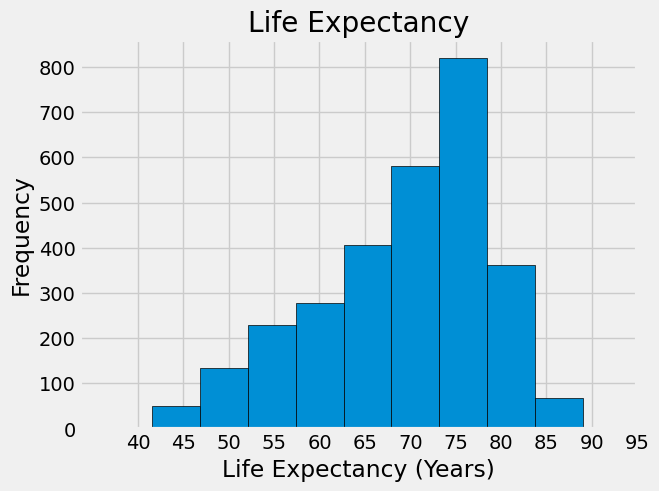

In [ ]:
#Here we are creating a histogram that gives the distibution on the years of
#life expectancy and frequency of ALL the records in the database
plt.hist(original_hist['life_expec'], edgecolor = 'black')
plt.xticks(np.arange(40,100, 5))
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.title('Life Expectancy');

From all of the records within the database regardless of status and country, the distribution of life expectancy ranges from the mid 40s to late 80s. The most frequent life expectancy by far is most prominent at about 75-80 years of life. It will be interesting to see how this will differentiate when we separate the data by status...

In [ ]:
#Here we are creating a table with the year and
#life expectancy of countries with the status of "Developed"
sql_statement = """SELECT yr, life_expec
                    FROM life_exp
                    WHERE status = "Developed"


                    """

developed_hist = pd.read_sql_query(sql_statement, conn )
developed_hist

,yr,life_expec
0,2015,82.8
1,2014,82.7
2,2013,82.5
3,2012,82.3
4,2011,82.0
...,...,...
507,2004,77.5
508,2003,77.2
509,2002,77.0
510,2001,76.9


In [ ]:
#Here we are creating a table with the year and
#life expectancy of countries with the status of "Developing"
sql_statement = """SELECT yr, life_expec
                    FROM life_exp
                    WHERE status = "Developing"



                    """

developing_hist = pd.read_sql_query(sql_statement, conn )
developing_hist

,yr,life_expec
0,2015,65.0
1,2014,59.9
2,2013,59.9
3,2012,59.5
4,2011,59.2
...,...,...
2421,2004,44.3
2422,2003,44.5
2423,2002,44.8
2424,2001,45.3


In [ ]:
#Since our previous histogram deaults to frequency of its y axis
#Here we create a multiple to get the percentage of each value of its x axis
#for "Developed" countries
num_rows = len(developed_hist)
multipliers = np.ones(num_rows) * 100 / num_rows

multipliers

array([0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125, 0.1953125,
       0.1953125, 0.1953125, 0.1953125, 0.1953125, 

In [ ]:
#Since our previous histogram deaults to frequency of its y axis
#Here we create a multiple to get the percentage of each value of its x axis
#for "Developing" countries
num_rows = len(developing_hist)
multipliers_deping = np.ones(num_rows) * 100 / num_rows

multipliers_deping

array([0.04122012, 0.04122012, 0.04122012, ..., 0.04122012, 0.04122012,
       0.04122012])

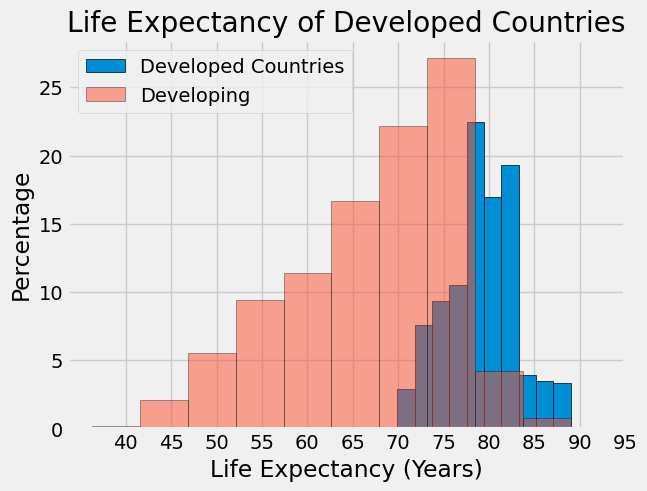

In [ ]:
#Here we are creating a histogram that gives the distibution on the years of
#life expectancy and frequency of the records in the database
# Between "Developed" and "Devloping" countries
plt.hist(developed_hist['life_expec'], edgecolor = 'black', weights = multipliers, zorder=1, label = 'Developed Countries')
plt.hist(developing_hist['life_expec'], edgecolor = 'black', weights = multipliers_deping, zorder = 2, alpha = .5, label = 'Developing')
plt.xticks(np.arange(40,100, 5))
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Percentage')
plt.title('Life Expectancy of Developed Countries')
plt.legend();

As we can see from the created graph above, "Devloping" countries life expectancy ranges from 40 to 90 with the most frequent life expectancy ranging from late 60s to late 70s. "Devloped" countries life expectancy ranges from 70 to 90 with the most frequent life expectancy ranging from late 70s to mid 80s. We can conclude from this graphic that countries with a "Devloped" status have a higher life expectancy than those in countires of a "Developing" status. It is valid to assume "developed" countires have a stronger economic, political, and social lifestlye which alludes to their higher average life expectancy.


Through our graph and code, we can see that life expentacy is higher in "developed" countries rather than "developing" countires. When looking at this graph, it has made us question how has this statistic changed over time. Has it always been the same?

### Q2:  How has the average life expectange age changed over time between Developed and Developing countries?

With the increase and improvement of technology and the rapid growth of medical advancements, living conditions have improved people's everyday life. But is that true for in reflect of life expectancy? Is that different for developing and developed countries? Seeing that change over time in the perspective of 15 years and seeing the difference in that change between the two different statuses will help us determine how life expectancy has changed over time.

In [ ]:
#Here we are creating a table with the average life expectancy for each year in the database
sql_statement = """
                  SELECT yr AS year, AVG(life_expec) AS avg_life_expec
                  FROM life_exp
                  GROUP BY yr
                                   """
life_exp_over = pd.read_sql_query(sql_statement, conn)
life_exp_over

,year,avg_life_expec
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448
5,2005,68.209290
6,2006,68.667760
7,2007,69.036066
8,2008,69.427869
9,2009,69.938251


Text(0, 0.5, 'Life Expectancy (AVG)')

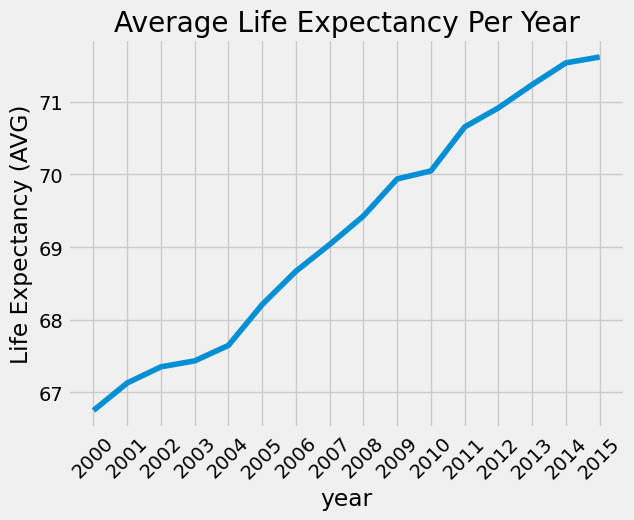

In [ ]:
#Here we are creating the code to show the line graph over the whole database
plt.plot(life_exp_over['year'], life_exp_over['avg_life_expec'])
plt.xticks(np.arange(2000, 2016, 1), rotation=45);
plt.title('Average Life Expectancy Per Year')
plt.xlabel('year')
plt.ylabel('Life Expectancy (AVG)')

Looking at the graph, we can see there is upward trend between the year and average life expectancy. The graph also looks pretty linear. Overall from the graph, we see that has time increases the average life expectany age also increases.

In [ ]:
#Here we are getting the the correlation coefficent table
life_exp_corr = life_exp_over.corr()
life_exp_corr

,year,avg_life_expec
year,1.000000,0.995184
avg_life_expec,0.995184,1.000000


In [ ]:
#Here we are showing the correlation coeffiecent for the graph
r_life = life_exp_corr["year"]["avg_life_expec"]
r_life
#The correlation coeffiecent is .99 which means there is a strong positive liner correlation between year and life expectancy

0.995183752544675

In [ ]:
#Here we are selecting the year and the average life expectancy to see how life expectancy has changed over time for developed countries
sql_statement = """
                  SELECT yr AS year, AVG(life_expec) AS avg_life_expec
                  FROM life_exp
                  WHERE status = 'Developed'
                  GROUP BY yr
                                   """
life_exp_line_dd = pd.read_sql_query(sql_statement, conn)
life_exp_line_dd
#I grouped by year so we can each distinct year from the database

,year,avg_life_expec
0,2000,76.803125
1,2001,77.128125
2,2002,77.546875
3,2003,77.940625
4,2004,78.384375
5,2005,78.590625
6,2006,79.131250
7,2007,79.300000
8,2008,78.931250
9,2009,79.584375


In [ ]:
#Here we are selecting the year and the average life expectancy to see how life expectancy has changed over time for developing countries
sql_statement = """
                  SELECT yr AS year, AVG(life_expec) AS avg_life_expec
                  FROM life_exp
                  WHERE status = 'Developing'
                  GROUP BY yr
                                   """
life_exp_line_dg = pd.read_sql_query(sql_statement, conn)
life_exp_line_dg
#I grouped by year so we can each distinct year from the database

,year,avg_life_expec
0,2000,64.619868
1,2001,65.009934
2,2002,65.190728
3,2003,65.206623
4,2004,65.370861
5,2005,66.009272
6,2006,66.450331
7,2007,66.860927
8,2008,67.413907
9,2009,67.894040


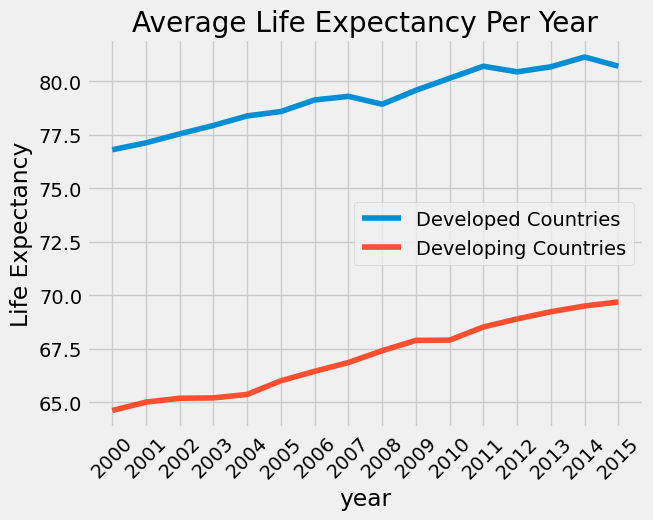

In [ ]:
#Include a comment at the top explaining what the code is doing:  Here we create the bar graph.
# Code for a visualization
plt.plot(life_exp_line_dd['year'], life_exp_line_dd['avg_life_expec'], label = 'Developed Countries')  #Input the column for the horizontal data
plt.plot(life_exp_line_dg['year'], life_exp_line_dg['avg_life_expec'], label = 'Developing Countries')
plt.xticks(np.arange(2000, 2016, 1), rotation=45);                                                                #and then column for the vertical data
plt.title('Average Life Expectancy Per Year')  #title
plt.xlabel('year')                      #label x axis
plt.ylabel('Life Expectancy')
plt.legend()


Looking at our graph, both developing and developed countries have had increasing average life expectancies over time. Also by looking at the graph, we can see that in developing countries, the average life expectancy age is signficantly lower than developed countries but it increasing by each year.

In [ ]:
# Here we are checking the correlation coeffiecent between year and average life expectancy for developed countries
developed_country_corr = life_exp_line_dd.corr()
developed_country_corr
#The r value is .977 which means there is a strong positive linear correlation between the two.

,year,avg_life_expec
year,1.000000,0.977893
avg_life_expec,0.977893,1.000000


In [ ]:
# Here we are checking the correlation coeffiecent between year and average life expectancy for developing countries
developing_country_corr = life_exp_line_dg.corr()
developing_country_corr
#The r value is .977 which means there is a strong positive linear correlation between the two.

,year,avg_life_expec
year,1.000000,0.993044
avg_life_expec,0.993044,1.000000


Through the code above, we learn that the overall average life expectancy age and the year for countries in the database, there is a strong postive linear relationship between life expectancy age and year as our r value is .99. This correlation is also reflected for both developed and developing countries as for both lines their r values were .99 and .97.



Through our graph and code, we can see that life expentacy age is improving over time. When looking at this graph, it has made us wonder the quality of schooling and life that could possibly influence life expectany as knowledge of your health largely affect your life and health choices.

### Q3:  Given all of average amount of schooling for the top/bottom 10 countries, what can we infer are the potential factors which contribute to these results?

To understand more about what could be a factor that could contribute to a country's overall status we decided to test if the average amount of schooling a country has. Specifically the bottom/top 10. After drawing data regarding schooling, we will infer what are reasonable assunmtions to make based on the average amount of schooling. Is the population high enough to employ enough teachers for the nations youth? Is the nation economically stable enough to build enough schools? The answers to these questions will give us a better understanding of our entire dataset.

In [ ]:
#Here we are creating a table with the years of schooling per country
#but limiting it to the top 10 countries with the highest schooling in the database
sql_statement = """SELECT schooling, country
                    FROM life_exp
                    GROUP BY country
                    ORDER BY schooling DESC
                    LIMIT 10
                    """

top_10 = pd.read_sql_query(sql_statement, conn )
top_10

,schooling,country
0,20.4,Australia
1,19.2,New Zealand
2,19.2,Denmark
3,19.0,Iceland
4,18.6,Ireland
5,18.1,Netherlands
6,17.7,Spain
7,17.7,Norway
8,17.3,Slovenia
9,17.3,Argentina


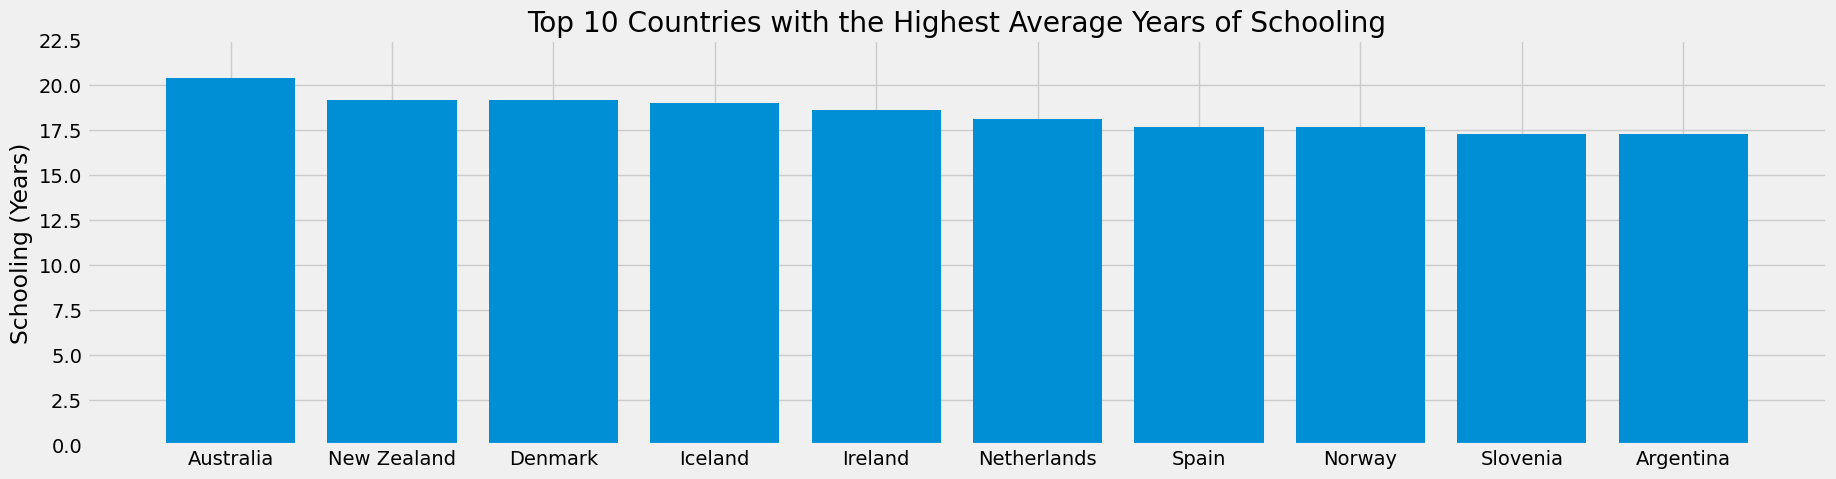

In [ ]:
#Here we are creating the code to show the bar graph of the
#Top 10 Countries with the Highest Average Years of Schooling in the database
plt.figure(figsize =(20,5))
plt.bar(top_10['country'], top_10['schooling'])
plt.ylabel('Schooling (Years)')
plt.title('Top 10 Countries with the Highest Average Years of Schooling')
plt.ylim(0, 22.5);

In a cohesive, grammatically correct sentence, write here what you learn from the visualization above.  Do not use nebulous words like "thing" or "it".  Be clear and concise.

As we see from the graph, the top 10 countries with the most amount of schooling on average are all european based, with the exeception of Australia who ranked in at the top spot with an average of 20 years of schooling and Argentina who were just above 17 years of schooling.

**What can be a reasonable assumption of the factors that contributed to these results?**

Reasonable assumptions that can be made based off the the results we see from the data presented stems from 2 determinants within the dataset (gdp [per capita] and income composition of resources). GDP per capita and income composition of resources essentially represents the value of output per person, which is an indirect indicator of per capita income. Growth in GDP and GDP per capita are considered broad measures of economic growth. We can infer from this bar graph that the countries shown have a relatively high gdp and income composition of resources thus they are able to allocate their assets into the creation of more schools leading to a higher average in schooling in years. It is valid to assume that these countries have the status of "developed"

In [ ]:
#Here we are checking to see if the top 10 schooling countries' status
sql_statement = """SELECT schooling, country, status
                    FROM life_exp
                    GROUP BY country
                    ORDER BY schooling DESC
                    LIMIT 10
                    """

top_10_status = pd.read_sql_query(sql_statement, conn )
top_10_status

,schooling,country,status
0,20.4,Australia,Developed
1,19.2,New Zealand,Developed
2,19.2,Denmark,Developed
3,19.0,Iceland,Developed
4,18.6,Ireland,Developed
5,18.1,Netherlands,Developed
6,17.7,Spain,Developed
7,17.7,Norway,Developed
8,17.3,Slovenia,Developed
9,17.3,Argentina,Developing


Our information suggests all of the countries' status appears as "developed" with the exception of Argentina. This suggest that this is causation vs correlation issue. A correlation test finds out if two variables are related. Nevertheless, just because two variables are traveling together does not necessarily mean they are connected. For this reason, we often use the phrase "correlation does not imply causation."

In [ ]:
#Here we are creating a table with the years of schooling per country
#but limiting it to the bottom 10 countries with the highest schooling in the database

sql_statement = """SELECT schooling, country
                    FROM life_exp
                    WHERE schooling IS NOT NULL
                    GROUP BY country
                    ORDER BY schooling ASC
                    LIMIT 10
                    """

bottom_10 = pd.read_sql_query(sql_statement, conn )
bottom_10

,schooling,country
0,0.0,Marshall Islands
1,0.0,Tuvalu
2,4.9,South Sudan
3,5.0,Eritrea
4,5.4,Niger
5,6.3,Djibouti
6,7.1,Central African Republic
7,7.2,Sudan
8,7.3,Chad
9,7.7,Burkina Faso


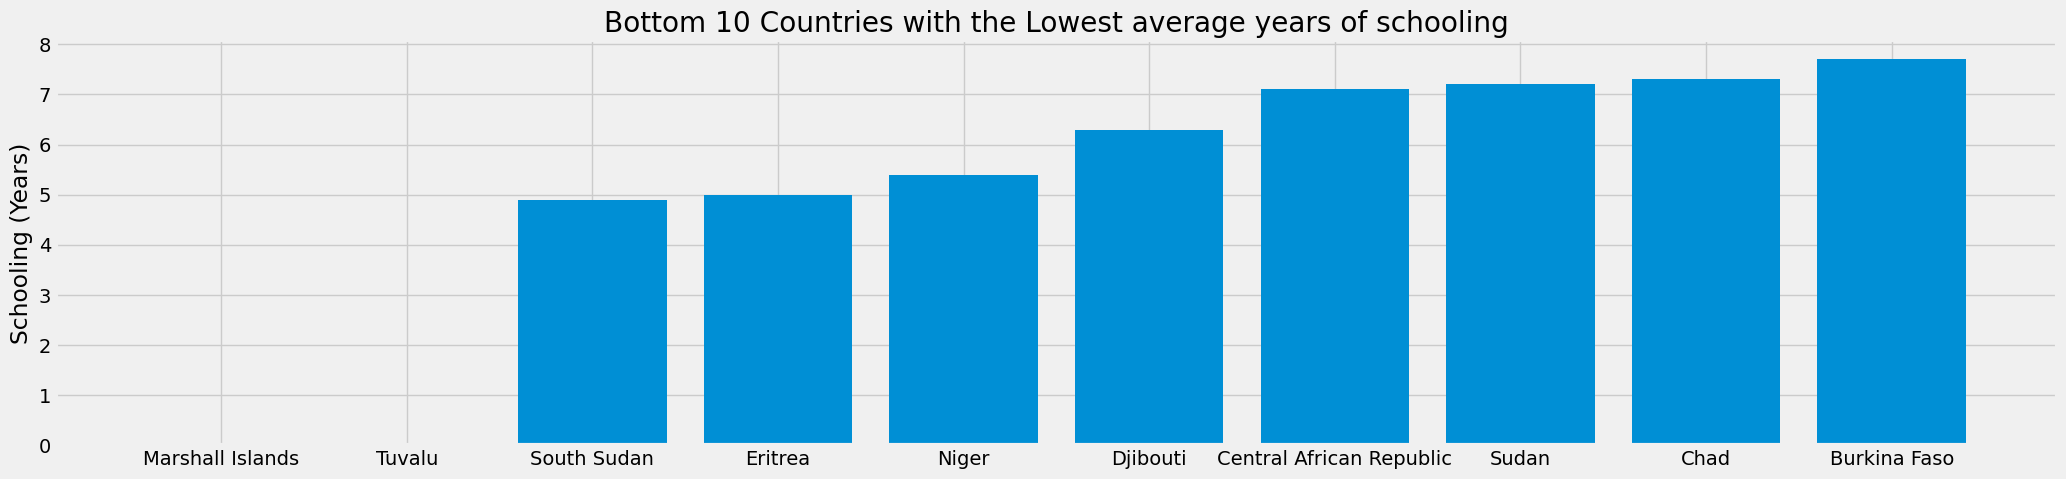

In [ ]:
#Here we are creating the code to show the bar graph of the
#Bottom 10 Countries with the Highest Average Years of Schooling in the database
plt.figure(figsize =(23,5))
plt.bar(bottom_10['country'], bottom_10['schooling'])
plt.ylabel('Schooling (Years)')
plt.title('Bottom 10 Countries with the Lowest average years of schooling') ;



As we see from the graph, the bottom 10 countries with the least amount of schooling on average are all African based, with the exeception of Marshall Island and Tuvalu who ranked in at the bottom spots with an average of 0 years of schooling.

**What can be a reasonable assumption of the factors that contributed to these results?**

Reasonable assumptions that can be made based off the the results we see from the data presented stems from 3 determinants within the dataset (gdp [per capita], population, and income composition of resources). As we stated in the previous explanation, GDP per capita and income composition of resources essentially represents the value of output per person, which is an indirect indicator of per capita income. Growth in GDP and GDP per capita are considered broad measures of economic growth. We can infer from this bar graph that the countries shown have a relatively low gdp and income composition of resources thus there is no economic flexibility to create enough schools to meet the standards of the population within the country leading to a lower average in schooling in years. Moreover, population plays a vital role in the effect of how many years of school on average a country typically has. If a population is low, it is less likely for a country to have enough educators to have a complete school system (primary school, middle school, secondary school, and then postsecondary education). It is valid to assume all of these countries have the status of "developing".

In [ ]:
#Here we are checking to see if the bottom 10 schooling countries' status
sql_statement = """SELECT schooling, country, status
                    FROM life_exp
                    WHERE schooling IS NOT NULL
                    GROUP BY country
                    ORDER BY schooling ASC
                    LIMIT 10
                    """

bottom_10_status = pd.read_sql_query(sql_statement, conn )
bottom_10_status

,schooling,country,status
0,0.0,Marshall Islands,Developing
1,0.0,Tuvalu,Developing
2,4.9,South Sudan,Developing
3,5.0,Eritrea,Developing
4,5.4,Niger,Developing
5,6.3,Djibouti,Developing
6,7.1,Central African Republic,Developing
7,7.2,Sudan,Developing
8,7.3,Chad,Developing
9,7.7,Burkina Faso,Developing



Through our graph and code, we can see that status and the amount of schooling are generally related. But we don't know that for sure. To have a proven method to see if two variables correlate, we must run a scatter plot. But from a more general sense of view that alludes to a countries economic state (GDP). Again with a higher GDP there is more possiblity that a nation can fund better health care, more quality food, ect to promote a higher life expectancy. It is likely the two will have a direct relationship.

### Q4: Does GPD of a country and life expectancy correlate? How has that correlation changed between 15 years?

Developed or richer countries, usually have more money based on their history and recent economic decisions. Based on the GPD of a country, you can see how wealthy they are. But do richer countries have higher life expectancy ages because they are richer as they would have more money into life saving technology.

In [ ]:
# Here we are selecting values for gdp and life_expecyancy for years 2000-2006
sql_statement1 = """
                   SELECT gdp, life_expec as life_expectancy
                   FROM life_exp
                   WHERE yr = 2000 and yr < 2007 """        #this line allows to select the values within 2000 and 2007
gdp_life_scatter = pd.read_sql_query(sql_statement1, conn)
gdp_life_scatter

,gdp,life_expectancy
0,114.560000,54.8
1,1175.788981,72.6
2,1757.177970,71.3
3,555.296942,45.3
4,9875.161736,73.6
...,...,...
178,NaN,72.5
179,NaN,73.4
180,NaN,68.0
181,341.955625,43.8


In [ ]:
# Here we are selecting values for gdp and life_expecyancy for years 2007-2015
sql_statement2 = """
                   SELECT gdp, life_expec as life_expectancy
                   FROM life_exp
                   WHERE yr >= 2007 """ #this line allows to select the values with the year 2007 and higher
gdp_life_scatter_later = pd.read_sql_query(sql_statement2, conn)
gdp_life_scatter_later

,gdp,life_expectancy
0,584.259210,65.0
1,612.696514,59.9
2,631.744976,59.9
3,669.959000,59.5
4,63.537231,59.2
...,...,...
1652,839.927936,54.9
1653,713.635620,52.4
1654,65.824121,50.0
1655,325.678573,48.2


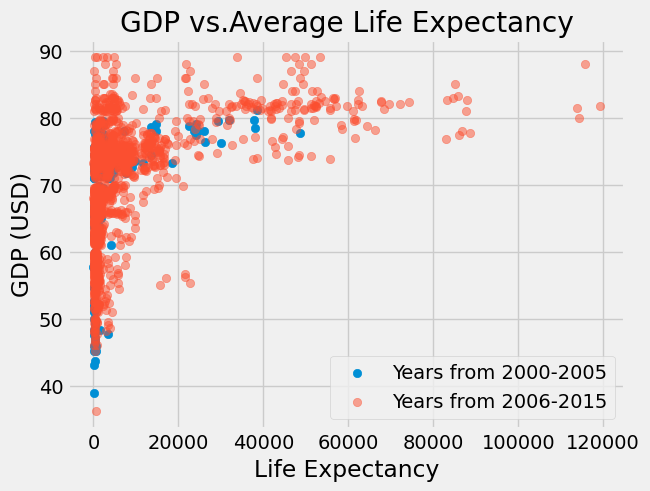

In [ ]:
# Here we create a scatter plot for both early and later years
plt.scatter(gdp_life_scatter['gdp'], gdp_life_scatter['life_expectancy'], label = 'Years from 2000-2005')
plt.scatter(gdp_life_scatter_later['gdp'],gdp_life_scatter_later['life_expectancy'], alpha = .5, label = 'Years from 2006-2015')
plt.title("GDP vs.Average Life Expectancy")
plt.xlabel('Life Expectancy')
plt.ylabel('GDP (USD)')
plt.legend()

Through our graph, we can see that there does seem to be a pattern between both life expectancy age and GDP for both earlier and later years. It does not seem to be linear but there is a pattern that looks like a log function. We can investigate further into this pattern.

In [ ]:
#Here we are getting the correlation table for the early years in our dataset
gdp_life_scatter_early_corr = gdp_life_scatter.corr()
gdp_life_scatter_early_corr

,gdp,life_expectancy
gdp,1.000000,0.459874
life_expectancy,0.459874,1.000000


In [ ]:
#Here we are getting the correlation coefficent for the early years in our dataset
r_gdp_life_early = gdp_life_scatter_early_corr["life_expectancy"]["gdp"]
r_gdp_life_early
#This is showing a moderate linear relationship between the two variables

0.45987371479726064

In [ ]:
#Here we are getting the correlation table for the later years in our dataset
gdp_life_scatter_later_corr = gdp_life_scatter_later.corr()
gdp_life_scatter_later_corr

,gdp,life_expectancy
gdp,1.000000,0.462427
life_expectancy,0.462427,1.000000


In [ ]:
#Here we are getting the correlation coefficent for the later years in our dataset
r_gdp_life_later = gdp_life_scatter_later_corr["life_expectancy"]["gdp"]
r_gdp_life_later
#This is showing a moderate linear relationship between the two variables

0.4624271725480026

Through this code, we can see that there is a moderate positive linear relationship between life expectancy age and GDP as the r value for both earlier and later years is .45 and .46. The pattern in the graph is still very interesting, so we will investiagate the possible logmirthic relationship between life expectange age and GPD.

In [ ]:
#This creates a new column called log_gdp to see if there a logmirthitc relationship between gdp and life_expectancy for the earlier years in the dataset
gdp_life_scatter["log_life_expec"] = np.log(gdp_life_scatter["life_expectancy"])
gdp_life_scatter["log_gdp"] = np.log(gdp_life_scatter["gdp"])
gdp_life_scatter

,gdp,life_expectancy,log_life_expec,log_gdp
0,114.560000,54.8,4.003690,4.741099
1,1175.788981,72.6,4.284965,7.069695
2,1757.177970,71.3,4.266896,7.471464
3,555.296942,45.3,3.813307,6.319503
4,9875.161736,73.6,4.298645,9.197778
...,...,...,...,...
178,NaN,72.5,4.283587,NaN
179,NaN,73.4,4.295924,NaN
180,NaN,68.0,4.219508,NaN
181,341.955625,43.8,3.779634,5.834681


In [ ]:
#This creates a new column called log_gdp to see if there a logmirthitc relationship between gdp and life_expectancy for the later years in the dataset
gdp_life_scatter_later["log_gdp"] = np.log(gdp_life_scatter["gdp"])
gdp_life_scatter_later["log_life_expec"] = np.log(gdp_life_scatter["life_expectancy"])
gdp_life_scatter_later

,gdp,life_expectancy,log_gdp,log_life_expec
0,584.259210,65.0,4.741099,4.003690
1,612.696514,59.9,7.069695,4.284965
2,631.744976,59.9,7.471464,4.266896
3,669.959000,59.5,6.319503,3.813307
4,63.537231,59.2,9.197778,4.298645
...,...,...,...,...
1652,839.927936,54.9,NaN,NaN
1653,713.635620,52.4,NaN,NaN
1654,65.824121,50.0,NaN,NaN
1655,325.678573,48.2,NaN,NaN


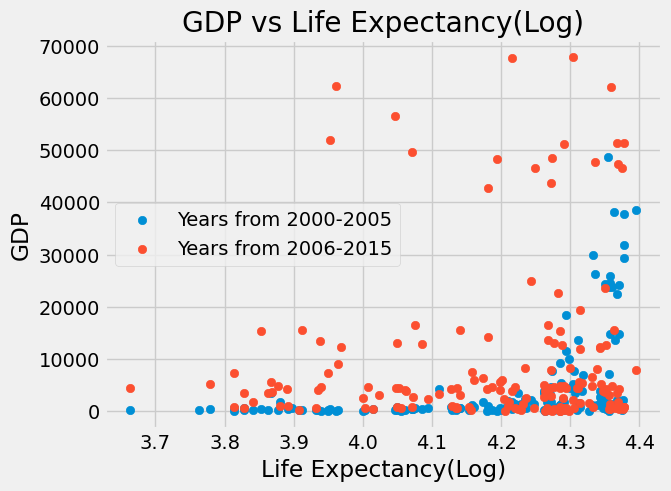

In [ ]:
#Here we are creating a new scatter plot for both earlier and later years to see if there is a logirthmic relationship
plt.scatter(gdp_life_scatter['log_life_expec'], gdp_life_scatter['gdp'],label = 'Years from 2000-2005')
plt.scatter(gdp_life_scatter_later['log_life_expec'], gdp_life_scatter_later['gdp'],label = 'Years from 2006-2015')
plt.title("GDP vs Life Expectancy(Log)")
plt.xlabel('Life Expectancy(Log)')
plt.ylabel('GDP')
plt.legend()

Through this new graph, we can see that there is still a pattern between the log of life expectancy age and GDP.

In [ ]:
gdp_log_life_scatter_early_corr = gdp_life_scatter.corr()
gdp_log_life_scatter_early_corr

,gdp,life_expectancy,log_life_expec,log_gdp
gdp,1.000000,0.459874,0.428796,0.756310
life_expectancy,0.459874,1.000000,0.996808,0.600442
log_life_expec,0.428796,0.996808,1.000000,0.577702
log_gdp,0.756310,0.600442,0.577702,1.000000


In [ ]:
#Here we are getting the correlation coefficent for the early years in our dataset
r_gdp_life_early_log = gdp_log_life_scatter_early_corr["life_expectancy"]["log_gdp"]
r_gdp_life_early_log
#This shows that there is a stronger logmirthic relationship between life expectancy and gdp than the linear relationship

0.600441517602636

In [ ]:
gdp_log_life_scatter_later_corr = gdp_life_scatter_later.corr()
gdp_log_life_scatter_later_corr

,gdp,life_expectancy,log_gdp,log_life_expec
gdp,1.000000,0.462427,0.041558,0.089047
life_expectancy,0.462427,1.000000,0.016411,0.061566
log_gdp,0.041558,0.016411,1.000000,0.577702
log_life_expec,0.089047,0.061566,0.577702,1.000000


In [ ]:
#Here we are getting the correlation coefficent for the later years in our dataset

r_gdp_life_later_log = gdp_log_life_scatter_later_corr["life_expectancy"]["log_gdp"]
r_gdp_life_later_log
#This shows that there is a weaker logmirthic relationship between life expectancy and gdp than the linear relationship

0.016411290734398665

Through the code above, we can see that there is more of a log relationship as the r value increased for the early years. With the log function, the r value increased from .4 to .6.

Through the analysis of the graphs above, we can see that GDP does have a relationship with life expectancy age. This made us thinking about how different government/regimine types greatly impacts economics and daily life standards. Do different government types keep people living longer?

### Q5:  Does the government type of a country influence the average life expectancy?

Through out history, countries have changed and evolved their government types. Different government types have developed a repuation on how they treat and serve their citizens which largely affect their health and lives. We wanted to see if the different types of government have different life expectancy ages and which government types have the best and worst life expectancy ages. We got the new data set with the government types for each country from DATABANKS INTERNATIONAL'S Cross-National Time-Series Data.

In [ ]:
#Here we are getting an overview of what our government data looks like
sql_statement4 = """
                   SELECT *
                   FROM gvt_data
                                          """
government = pd.read_sql_query(sql_statement4, conn)
government

,ID_country_name,ID_country_code,ID_year,regime_status_name,democratic_performance_name,democratic_performance_numeric
0,United States,2,1975,Democracy,High performing democracy,1.0
1,United States,2,1976,Democracy,High performing democracy,1.0
2,United States,2,1977,Democracy,High performing democracy,1.0
3,United States,2,1978,Democracy,High performing democracy,1.0
4,United States,2,1979,Democracy,High performing democracy,1.0
...,...,...,...,...,...,...
8528,World,999,2016,None,None,NaN
8529,World,999,2017,None,None,NaN
8530,World,999,2018,None,None,NaN
8531,World,999,2019,None,None,NaN


In [ ]:
#Here we are getting the average life expectancy age for each regime status or government type. We joined the data to get the correct results as well as doing a case when statement to properly display the distinct government types
sql_statement9 = """
                  SELECT AVG(life_expec) AS average_life_expectancy,
                    CASE
                      WHEN regime_status_name IS NULL THEN 'Not Specified'
                      WHEN regime_status_name = 'Authoritarian Regime' THEN 'Authoritarian Regime'
                      WHEN regime_status_name = 'Democracy' THEN 'Democracy'
                      WHEN regime_status_name = 'Hybrid Regime' THEN 'Hybrid Regime'
                    END AS government_type
                  FROM life_exp
                    JOIN gvt_data
                      ON  country = ID_country_name
                    GROUP BY government_type


"""
government_join = pd.read_sql_query(sql_statement9, conn)
government_join

,average_life_expectancy,government_type
0,65.031313,Authoritarian Regime
1,73.106427,Democracy
2,66.179672,Hybrid Regime
3,54.244048,Not Specified


Text(0.5, 1.0, 'Average Life Expectancy by Government Type')

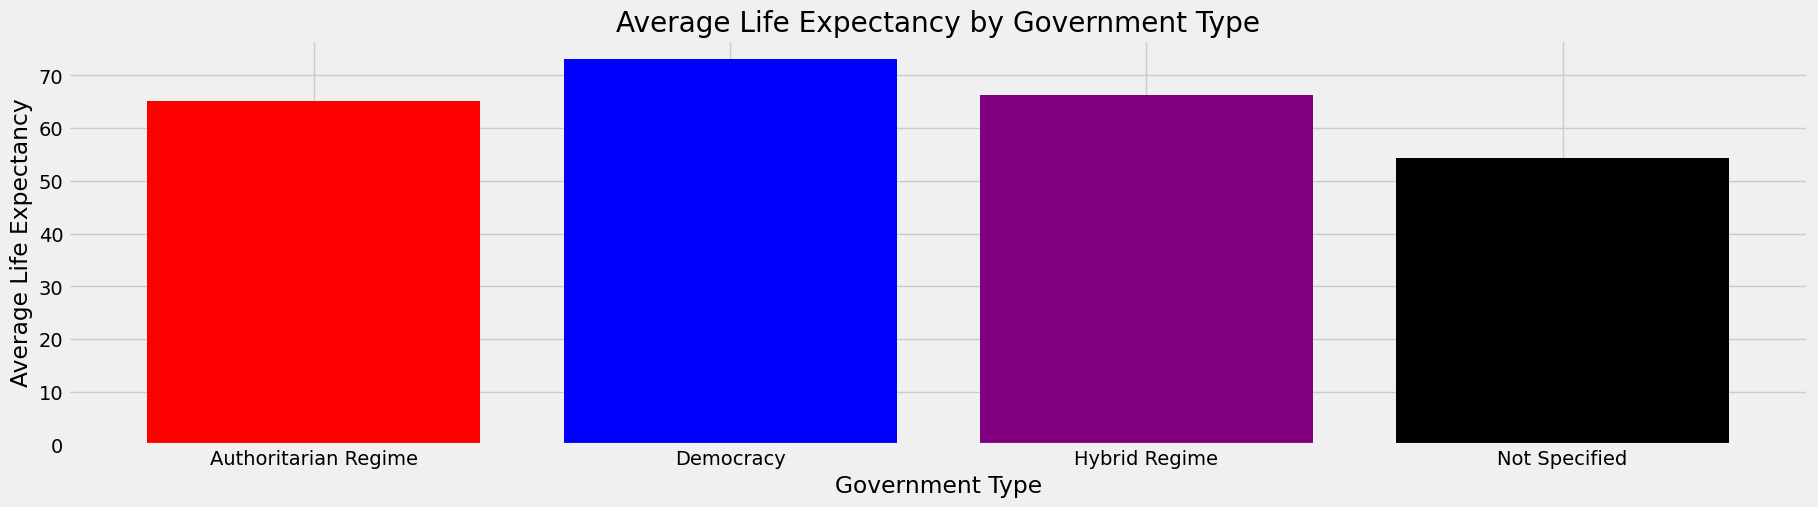

In [ ]:
#Here we are creating the bar graph to show the average life expectancy for each government type
plt.figure(figsize =(20,5))
plt.bar(government_join['government_type'], government_join['average_life_expectancy'], color=['red', 'blue', 'purple', 'black'])
plt.ylabel('Average Life Expectancy')
plt.xlabel('Government Type')
plt.title('Average Life Expectancy by Government Type')

Through our graph above, you can see that Democracy has the highest average life expectancy age. Not specific government types have the lowest average life expectancy age. This could be caused by the unstability and constant change of authority on those countries which would hinder resources that would benefit its citzen health wise. Democracy has the highest life expectancy average beccause those countries are more likely to be more stable and have fair elections where the citizens can properly have say on where those resources go. Also democratic countries tend to have higher GDPs where we established earlier that there is a pattern between GDP and life expectancy.

Given the different government types and GDP, money has a large influence on how long citzens of these countries health and how long they live. What is also interesting how those same countries specifally allocate resources and money to health. We will investigate this query next.

### Q6+:  How do different country statuses and their human development index spend on healthcare in their country?

With every government in each country, the people in that government discuss and come up with different ways to allocate the money for the benefit of its citzens. It is also interesting to look at how developed these countries are and how they choose to use their money knowing the state of their country. In our database, total expenditure represents the amount that a countries allocates towards healthcare. The Human Development Index rates each country with a number on how developed and stable they are as a society. We would like to investiagte how differently each country status and what Human Development Index rankings spend on their country's healthcare.

In [ ]:
#Here I am getting a new table to display the status, Human Development Index and total expenditure on health care. I have grouped the HDI into groups.
sql_statement6 = """
                  SELECT status,inc_comp_res, total_exp,
                    CASE
                      WHEN inc_comp_res <= .5 THEN 'Low Human Development Index'
                      WHEN inc_comp_res >= .6 and inc_comp_res < .8 THEN 'Medium Human Development Index'
                      WHEN inc_comp_res >= .8 THEN 'High Human Development Index'
                    END AS HumanDevelopmentIndexRating
                  FROM life_exp



"""
ratings = pd.read_sql_query(sql_statement6, conn)
ratings

,status,inc_comp_res,total_exp,HumanDevelopmentIndexRating
0,Developing,0.479,8.16,Low Human Development Index
1,Developing,0.476,8.18,Low Human Development Index
2,Developing,0.470,8.13,Low Human Development Index
3,Developing,0.463,8.52,Low Human Development Index
4,Developing,0.454,7.87,Low Human Development Index
...,...,...,...,...
2933,Developing,0.407,7.13,Low Human Development Index
2934,Developing,0.418,6.52,Low Human Development Index
2935,Developing,0.427,6.53,Low Human Development Index
2936,Developing,0.427,6.16,Low Human Development Index


In [ ]:
#Here we are creating a group by table for the staked bar graph
agg_ratings = ratings.groupby(['HumanDevelopmentIndexRating', 'status'])['total_exp'].sum().unstack().fillna(0)
agg_ratings

status,Developed,Developing
HumanDevelopmentIndexRating,,
High Human Development Index,2593.89,911.78
Low Human Development Index,0.00,3793.25
Medium Human Development Index,560.34,6027.30


In the code above, we created a ranking system based on the different human development index scores to create a new table and column for each country so it would be easier to group. Then we created a grouping table for the bar graph.

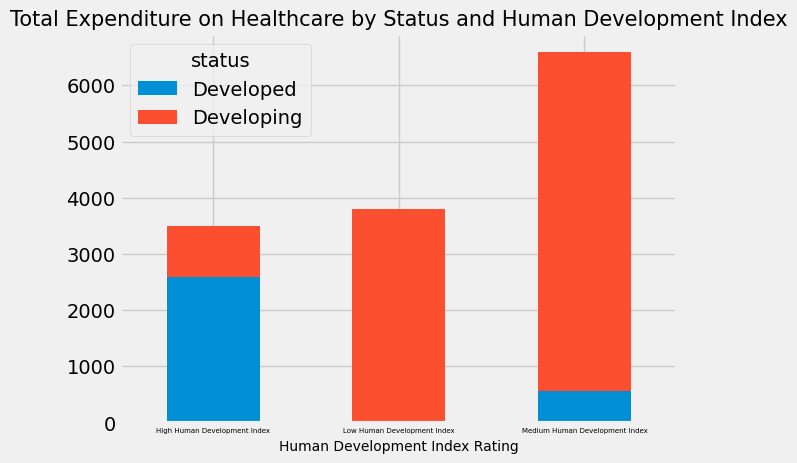

In [ ]:
#Here we are creating the staked bar graph
agg_ratings.plot(kind='bar', stacked=True)

plt.title('Total Expenditure on Healthcare by Status and Human Development Index',fontsize = 15)
plt.xticks(rotation=0, ha='center', fontsize = 5)
plt.xlabel('Human Development Index Rating', fontsize = 10)
agg_ratings_sorted = ratings.sort_values('total_exp')

In the graph above, it shows the amount spend on healthcare by Human Development Index and status of the country. The graph shows that for high human development index rankings, developed countries spend more on healthcare. With low human development index countries, developing countries spend the most as there is no developed countries with low human development index scores. With medium human development index scores, developing countries spend more on healthcare as there are probably more developing countries that have medium human development index rankings than developed countries.

This graph is a great depiciton of how different country statuses and human development index rankings priortize their money to different places especially sectors like healthcare. With the money spent on healthcare, that money goes to things like equipment, facilities, and medicine like vaccines which we know is a intergal part of our society by keeping people safe from the spread of life ending diseases. But if your country is not rich or does not allocate money to healthcare to get the proper care and equipment and people to create and distrubute those vaccines espcially to people who need it most like babies, is it possible that those countries suffer more in baby deaths because they are not vaccinating the proper amount? We will investiagte in this query next.

###Q7: Does the percentage of 1 year olds getting vaccinated correlate with in the amount of infant death? How does it vary between vaccines of different disease?

The history of vaccines and vaccine mandates have had a interesting evolution over time. These vaccines were made to prevent our young from getting sick and passing it on to other who are more acceptable to illness. Again, these resources are not widely available in some countries and their youth is not getting the proper care and treatment to survive sustainabily. But we wanted to see if this was happening through our data. Does the percentage of vaccinated correlate with infant death and how do different vaccines of different diseases compare?

In [ ]:
#Here we are displaying the amount of infant death and the different dieseases there ate vaccinces for
sql_statement7 = """
                   SELECT infant_death, hepatitis_B,polio,diphtheria
                   FROM  life_exp
"""
diseases = pd.read_sql_query(sql_statement7, conn)
diseases

,infant_death,hepatitis_B,polio,diphtheria
0,62,65.0,6.0,65.0
1,64,62.0,58.0,62.0
2,66,64.0,62.0,64.0
3,69,67.0,67.0,67.0
4,71,68.0,68.0,68.0
...,...,...,...,...
2933,27,68.0,67.0,65.0
2934,26,7.0,7.0,68.0
2935,25,73.0,73.0,71.0
2936,25,76.0,76.0,75.0


In [ ]:
#Here we are creating a dataframe for just the hepatitis B vaccine and infant death to use for the stacked scatter plot
sql_statement8 = """
                   SELECT infant_death, hepatitis_B
                   FROM  life_exp
"""
hep_b = pd.read_sql_query(sql_statement8, conn)
hep_b

,infant_death,hepatitis_B
0,62,65.0
1,64,62.0
2,66,64.0
3,69,67.0
4,71,68.0
...,...,...
2933,27,68.0
2934,26,7.0
2935,25,73.0
2936,25,76.0


In [ ]:
#Here we are creating a dataframe for just the polio vaccine and infant death to use for the stacked scatter plot
sql_statement3 = """
                   SELECT infant_death, polio
                   FROM  life_exp
"""
polio = pd.read_sql_query(sql_statement3, conn)
polio

,infant_death,polio
0,62,6.0
1,64,58.0
2,66,62.0
3,69,67.0
4,71,68.0
...,...,...
2933,27,67.0
2934,26,7.0
2935,25,73.0
2936,25,76.0


In [ ]:
#Here we are creating a dataframe for just the diphteria vaccine and infant death to use for the stacked scatter plot
sql_statement = """
                   SELECT infant_death,diphtheria
                   FROM  life_exp
"""
dip = pd.read_sql_query(sql_statement, conn)
dip

,infant_death,diphtheria
0,62,65.0
1,64,62.0
2,66,64.0
3,69,67.0
4,71,68.0
...,...,...
2933,27,65.0
2934,26,68.0
2935,25,71.0
2936,25,75.0


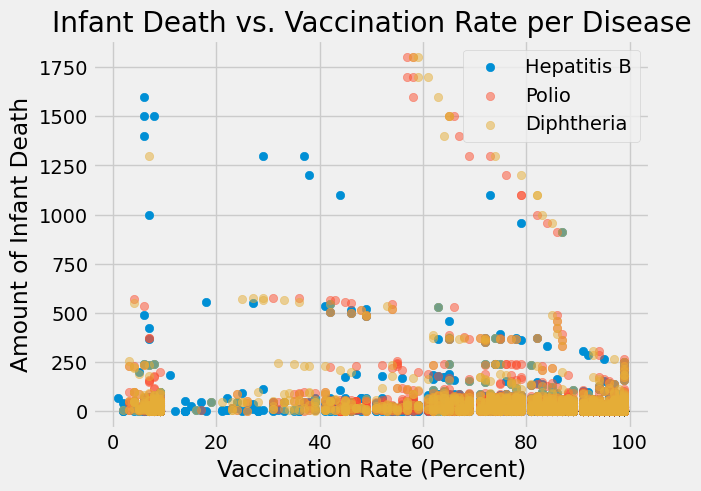

In [ ]:
#Here we are creating a stacked scatter plot with all of our disease dataframes and infant death
plt.scatter(hep_b['hepatitis_B'], hep_b['infant_death'], label = 'Hepatitis B')
plt.scatter(polio['polio'],polio['infant_death'], alpha = .5, label = 'Polio')
plt.scatter(dip['diphtheria'],dip['infant_death'], alpha = .5, label = 'Diphtheria')
plt.title("Infant Death vs. Vaccination Rate per Disease")
plt.xlabel('Vaccination Rate (Percent)')
plt.ylabel('Amount of Infant Death')
plt.legend()

From the graph, we see that the 3 vaccines are very scattered. There does not seem to be a clear correlation. But we can see that a lot of the plots are concentrated towards the lower part of the graph. This shows that there are very few infant deaths.

In [ ]:
#Here we are getting the correlation coeffiecent table for infant death and hepatitis B
hep_b_corr = hep_b.corr()
hep_b_corr

,infant_death,hepatitis_B
infant_death,1.000000,-0.223566
hepatitis_B,-0.223566,1.000000


In [ ]:
#Here we are displaying the correlation coeffiecent between heptatitis B and infant death
r_hep_b = hep_b_corr["hepatitis_B"]["infant_death"]
r_hep_b
#the r value is -.22 which means there is a weak negative linear relationship between hepatitis B and infant death

-0.22356628100884832

In [ ]:
#Here we are getting the correlation coeffiecent table for infant death and polip
polio_corr = polio.corr()
polio_corr

,infant_death,polio
infant_death,1.000000,-0.170689
polio,-0.170689,1.000000


In [ ]:
#Here we are displaying the correlation coeffiecent between polio and infant death
r_polio = polio_corr["polio"]["infant_death"]
r_polio
#the r value is -.17 which means there is a weak negative linear relationship between polio and infant death

-0.1706885594356424

In [ ]:
#Here we are getting the correlation coeffiecent table for infant death and diptheria
dip_corr = dip.corr()
dip_corr

,infant_death,diphtheria
infant_death,1.000000,-0.175171
diphtheria,-0.175171,1.000000


In [ ]:
#Here we are displaying the correlation coeffiecent between diphtheria and infant death
r_dip = dip_corr["diphtheria"]["infant_death"]
r_dip
#the r value is -.18 which means there is a weak negative linear relationship diphtheria and infant death

-0.17517149631802648

In the code above, we were able to retrieve the correlation table and correlation coeffiecent for each vaccine type. Each r value was between .1 and .2 meaning there was a weak negative linear relationship between infant death and the percentage of babies vaccinated. The negative r value shows that the when the percentage of vaccinated increases, the number of infant death decreases. Even though this relationship is weak, it is still there.

---

## Conclusion

  When we intially discussed the format of questions we planned to answer within our report, we intended to be met with frequent data of how "developed" countries have higher life expectancies than "developing" countries on the majority of aspects we tested. We ran different visualization techniques and numerous life expectancy factors to test our hypothesis'.
  Throughout our tests we found that people with a longer average life expectancy come from countries with a "developed" status rather than a "developing" status. Moreover, we found that slowly but surely, the life expectancies of both "developing" and "developed" countries have been increasing since 2000. We found out the countries with the highest amount of schooling come from "developed" countries and the countries with the lowest amount of schooling come from "developing" countries.
   Next, we found that both GDP and life expectancy have a positive correlation alluding to the fact that when GDP is growing, employment is likely to be increasing as companies hire more workers resulting in people having more money to allocate towards better health care, food, ect. We then joined another dataset to our life expectancy set to essentially find out how a countries regime type is correlated to life expectancy which we saw that countries with a Democracy-based government have the highest average life expectancy. We then found the total expenditure on healthcare by status and Human Development Index. Finally, we sought to find how vaccines to certain diseases contribute to the infant death rate.
   If we had more time to conduct this project, we believe joining an additional dataset would be benefical to us to determine even more factors that affect life expectancy which in turn will sharpen the accuracy of our overall data.
  Though testing our predictions came back as correct, it was fascinating to analyze the different aspects of what specifically contributes to a higher average life expectancy and sharing our thoughts on the mattter. Ultimately, statistics on life expectancy is a tool for evaluating the social economic, and politcal status of populations. We learn more about the quality and efficiency of public health initiatives on human longevity by analyzing patterns in life expectancy over time and across various countries.

# New Section